In [1]:
!pip install rebound

    100% |████████████████████████████████| 225kB 1.5MB/s ta 0:00:01
  Stored in directory: /Users/jillnaiman1/Library/Caches/pip/wheels/35/fc/f6/408c5e9b49025769e888f5ebedcc5e92fecda094a7fb48f8f8
Successfully built rebound


In [2]:
import rebound
import numpy as np
%matplotlib inline

In [3]:
sim = rebound.Simulation()
sim.add(["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune"],date="2018-02-10 00:00")
sim.save("ss.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [4]:
sim = rebound.Simulation("ss.bin")
sim.add(primary=sim.particles[0],
        M=3.68007 *np.pi/180.,
        a=1.34126487,
        omega = 177.28664 *np.pi/180.,
        Omega = 317.45885 *np.pi/180.,
        e = 0.2648281,
        inc = 1.09424 *np.pi/180.)

In [5]:
tesla = sim.particles[-1]
earth = sim.particles[3]
r=np.linalg.norm(np.array(tesla.xyz) - np.array(earth.xyz))
v=np.linalg.norm(np.array(tesla.vxyz) - np.array(earth.vxyz))
energy = 0.5*v*v-earth.m/r
c3 = 2.*energy*887.40652 # from units where G=1, length=1AU to km and s
print("c3 = %f (km^2/s^2)" % c3)

c3 = 11.943788 (km^2/s^2)


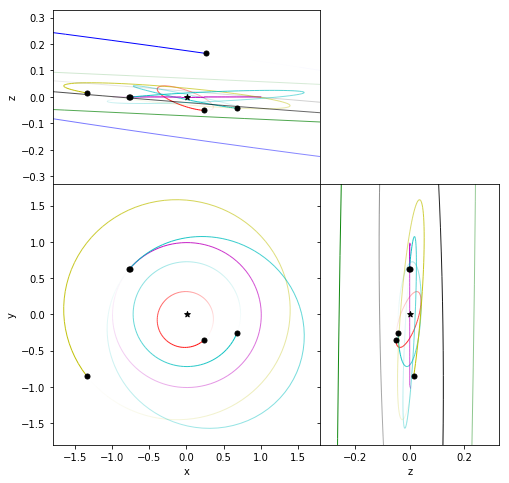

In [7]:
rebound.OrbitPlot(sim,lim=1.8,slices=True,color=True);